In [1]:
from google.colab import drive

drive.mount('/content/drive')
datasheet = '/content/drive/My Drive/Datasheet/dataset_sdn.csv'

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv(datasheet)

In [3]:
#Mengecek info DataFrame
print('Info dari Datasheet\n')
df.info()

Info dari Datasheet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_

In [4]:
#Mengecek ukuran dataFrame (jumlah baris, jumlah kolom)
print('Jumlah baris dan Jumlah kolom datasheet ini:')
df.shape

Jumlah baris dan Jumlah kolom datasheet ini:


(104345, 23)

In [5]:
#Distribusi dari kolom label
df['label'].value_counts()

,count
label,
0,63561
1,40784


In [6]:
print('Jumlah Missing Values')
print(df.isnull().sum())

Jumlah Missing Values
dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64


In [11]:
# Menghapus kolom bernilai null
df = df.dropna(subset=['rx_kbps','tot_kbps'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103839 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           103839 non-null  int64  
 1   switch       103839 non-null  int64  
 2   src          103839 non-null  object 
 3   dst          103839 non-null  object 
 4   pktcount     103839 non-null  int64  
 5   bytecount    103839 non-null  int64  
 6   dur          103839 non-null  int64  
 7   dur_nsec     103839 non-null  int64  
 8   tot_dur      103839 non-null  float64
 9   flows        103839 non-null  int64  
 10  packetins    103839 non-null  int64  
 11  pktperflow   103839 non-null  int64  
 12  byteperflow  103839 non-null  int64  
 13  pktrate      103839 non-null  int64  
 14  Pairflow     103839 non-null  int64  
 15  Protocol     103839 non-null  object 
 16  port_no      103839 non-null  int64  
 17  tx_bytes     103839 non-null  int64  
 18  rx_bytes     103839 non-null 

In [15]:
from sklearn.preprocessing import OneHotEncoder

df['Protocol'] = df['Protocol'].astype(str)

encoding = OneHotEncoder(sparse_output=False)
encoded  = encoding.fit_transform(df[['Protocol']]).astype(int)
encoded  = pd.DataFrame(
    encoded,
    columns=encoding.get_feature_names_out(['Protocol']),
    index= df.index
)
df = pd.concat([df.drop(columns=['Protocol']), encoded], axis =1)
df.columns

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes',
       'tx_kbps', 'rx_kbps', 'tot_kbps', 'label', 'Protocol_ICMP',
       'Protocol_TCP', 'Protocol_UDP'],
      dtype='object')

In [17]:
Features = [
    'dt','dur','dur_nsec','tot_dur','pktrate','Protocol_TCP','Protocol_ICMP','Protocol_UDP',
    'port_no','tx_kbps','rx_kbps','tot_kbps'
]
df_clean = df[Features]

In [18]:
from sklearn.model_selection import train_test_split

X = df_clean
y = df['label']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size = 0.2, random_state=42, stratify=y
)

In [21]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)
model_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [22]:
predict = model_rf.predict(X_test)

In [23]:
# Hyperparameter yang digunakan
from pprint import pprint

print('Hyperparameter yang sedang digunakan:')
pprint(model_rf.get_params())

Hyperparameter yang sedang digunakan:
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


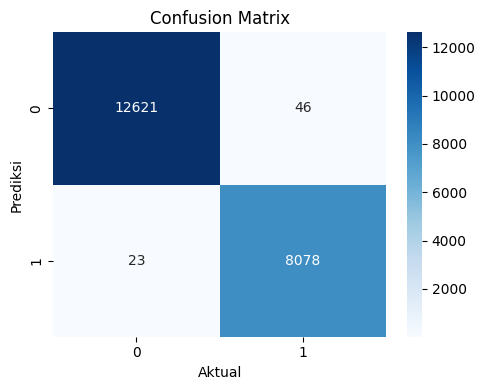

In [27]:
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    f1_score, recall_score
)
import matplotlib.pyplot as plt
import seaborn as sns

#Confusion Matrix
cm = confusion_matrix(y_test, predict)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Aktual')
plt.ylabel('Prediksi')
plt.tight_layout()
plt.show()

In [32]:
#Evaluasi Model RandomForest
accuracy = accuracy_score(y_test, predict)
f1 = f1_score(y_test, predict, average=None)
recall = recall_score(y_test, predict, average=None)
labels = ['Normal (0)','DDoS (1)']

print('=== Evaluasi Model ===')
print(f'Akurasi         : {accuracy:.4f}')
print(f'F1-Score Normal : {f1[0]:.4f}')
print(f'F1-Score DDoS   : {f1[1]:.4f}')
print(f'Recall Normal   : {recall[0]:.4f}')
print(f'Recall DDoS     : {recall[1]:.4f}')
print("\n=== Classifacation Report ===")
print(classification_report(y_test, predict, digits=4))

=== Evaluasi Model ===
Akurasi         : 0.9967
F1-Score Normal : 0.9973
F1-Score DDoS   : 0.9957
Recall Normal   : 0.9964
Recall DDoS     : 0.9972

=== Classifacation Report ===
              precision    recall  f1-score   support

           0     0.9982    0.9964    0.9973     12667
           1     0.9943    0.9972    0.9957      8101

    accuracy                         0.9967     20768
   macro avg     0.9963    0.9968    0.9965     20768
weighted avg     0.9967    0.9967    0.9967     20768



In [35]:
importances = model_rf.feature_importances_
Features = X_train.columns

importance_df = pd.DataFrame({
    'Fitur': Features,
    'Importance': importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

/tmp/ipython-input-787628164.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Fitur', data=importance_df.head(10), palette='viridis')


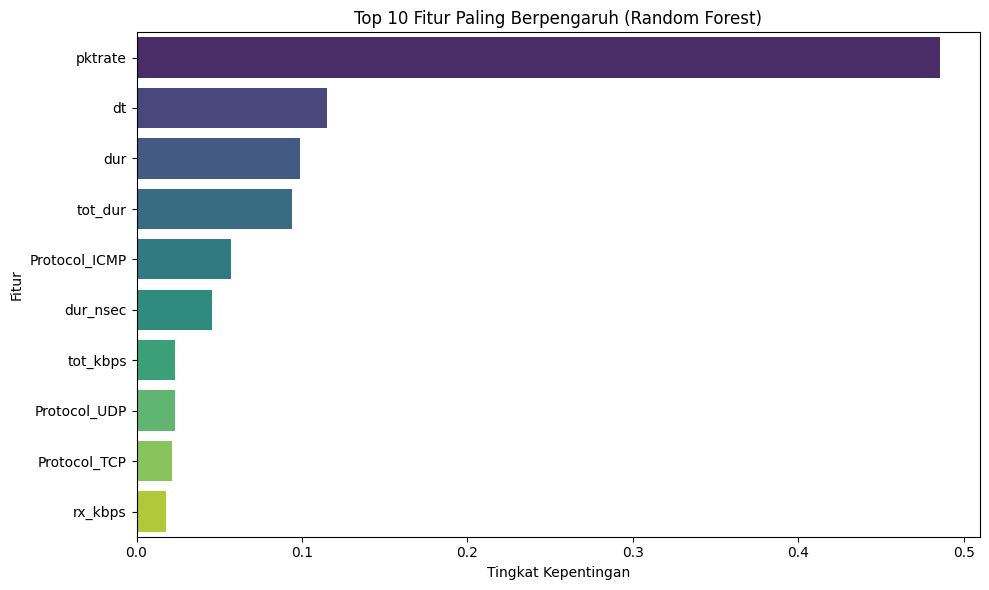

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Fitur', data=importance_df.head(10), palette='viridis')
plt.title('Top 10 Fitur Paling Berpengaruh (Random Forest)')
plt.xlabel('Tingkat Kepentingan')
plt.ylabel('Fitur')
plt.tight_layout()
plt.show()

In [39]:
import joblib

joblib.dump(model_rf, "ddos_detection_RF_Models.pkl")

from google.colab import files
files.download("ddos_detection_RF_Models.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>